<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n20.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.043815,72.086425,42.362146,668.210337,890.702722,489.084010,401.618712
1,0.0,1.0,36.689410,81.014814,23.479838,-168.327926,-17.143864,228.762152,-245.906016
2,0.0,2.0,87.892518,29.100020,49.005727,317.965322,493.963586,287.127724,206.835862
3,0.0,3.0,95.735264,67.846155,79.542618,680.418458,933.542495,444.985790,488.556705
4,0.0,4.0,39.265423,97.838233,97.027996,1344.834576,1588.966229,263.902198,1325.064031
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.802466,71.572655,53.595171,-75.841217,116.129075,17.873550,98.255525
119996,999.0,116.0,64.939244,66.852571,96.048768,935.628904,1173.469486,34.930373,1138.539113
119997,999.0,117.0,47.226686,20.974205,45.660063,-13.555782,110.305172,294.454571,-184.149399
119998,999.0,118.0,65.112653,59.336204,29.965973,857.021117,1021.435947,25.908218,995.527729


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.043815,72.086425,42.362146,668.210337,890.702722,489.084010,401.618712
1,0.0,1.0,36.689410,81.014814,23.479838,-168.327926,-17.143864,228.762152,-245.906016
2,0.0,2.0,87.892518,29.100020,49.005727,317.965322,493.963586,287.127724,206.835862
3,0.0,3.0,95.735264,67.846155,79.542618,680.418458,933.542495,444.985790,488.556705
4,0.0,4.0,39.265423,97.838233,97.027996,1344.834576,1588.966229,263.902198,1325.064031
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.802466,71.572655,53.595171,-75.841217,116.129075,17.873550,98.255525
119996,999.0,116.0,64.939244,66.852571,96.048768,935.628904,1173.469486,34.930373,1138.539113
119997,999.0,117.0,47.226686,20.974205,45.660063,-13.555782,110.305172,294.454571,-184.149399
119998,999.0,118.0,65.112653,59.336204,29.965973,857.021117,1021.435947,25.908218,995.527729


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.043815  72.086425  42.362146   668.210337   890.702722   
      1.0    36.689410  81.014814  23.479838  -168.327926   -17.143864   
      2.0    87.892518  29.100020  49.005727   317.965322   493.963586   
      3.0    95.735264  67.846155  79.542618   680.418458   933.542495   
      4.0    39.265423  97.838233  97.027996  1344.834576  1588.966229   
...                ...        ...        ...          ...          ...   
999.0 115.0  56.802466  71.572655  53.595171   -75.841217   116.129075   
      116.0  64.939244  66.852571  96.048768   935.628904  1173.469486   
      117.0  47.226686  20.974205  45.660063   -13.555782   110.305172   
      118.0  65.112653  59.336204  29.965973   857.021117  1021.435947   
      119.0  31.967974  60.002660  30.645212  1299.185482  1431.801328   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    489.084010   401.618712  
      1.0    228.762152  -245.906016  
      2.0    287.127724   206.835862  
      3.0    444.985790   488.556705  
      4.0    263.902198  1325.064031  
...                 ...          ...  
999.0 115.0   17.873550    98.255525  
      116.0   34.930373  1138.539113  
      117.0  294.454571  -184.149399  
      118.0   25.908218   995.527729  
      119.0  161.412368  1270.388960  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.043815  72.086425  42.362146   668.210337   890.702722   
      1.0    36.689410  81.014814  23.479838  -168.327926   -17.143864   
      2.0    87.892518  29.100020  49.005727   317.965322   493.963586   
      3.0    95.735264  67.846155  79.542618   680.418458   933.542495   
      4.0    39.265423  97.838233  97.027996  1344.834576  1588.966229   
...                ...        ...        ...          ...          ...   
999.0 115.0  56.802466  71.572655  53.595171   -75.841217   116.129075   
      116.0  64.939244  66.852571  96.048768   935.628904  1173.469486   
      117.0  47.226686  20.974205  45.660063   -13.555782   110.305172   
      118.0  65.112653  59.336204  29.965973   857.021117  1021.435947   
      119.0  31.967974  60.002660  30.645212  1299.185482  1431.801328   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    489.084010   401.618712  
      1.0    228.762152  -245.906016  
      2.0    287.127724   206.835862  
      3.0    444.985790   488.556705  
      4.0    263.902198  1325.064031  
...                 ...          ...  
999.0 115.0   17.873550    98.255525  
      116.0   34.930373  1138.539113  
      117.0  294.454571  -184.149399  
      118.0   25.908218   995.527729  
      119.0  161.412368  1270.388960  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,98.043815,72.086425,42.362146,668.210337,890.702722,489.084010,401.618712
1,0.0,1.0,36.689410,81.014814,23.479838,-168.327926,-17.143864,228.762152,-245.906016
2,0.0,2.0,87.892518,29.100020,49.005727,317.965322,493.963586,287.127724,206.835862
3,0.0,3.0,95.735264,67.846155,79.542618,680.418458,933.542495,444.985790,488.556705
4,0.0,4.0,39.265423,97.838233,97.027996,1344.834576,1588.966229,263.902198,1325.064031
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.802466,71.572655,53.595171,-75.841217,116.129075,17.873550,98.255525
119996,999.0,116.0,64.939244,66.852571,96.048768,935.628904,1173.469486,34.930373,1138.539113
119997,999.0,117.0,47.226686,20.974205,45.660063,-13.555782,110.305172,294.454571,-184.149399
119998,999.0,118.0,65.112653,59.336204,29.965973,857.021117,1021.435947,25.908218,995.527729


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    98.043815  72.086425  42.362146   668.210337   890.702722   
      1.0    36.689410  81.014814  23.479838  -168.327926   -17.143864   
      2.0    87.892518  29.100020  49.005727   317.965322   493.963586   
      3.0    95.735264  67.846155  79.542618   680.418458   933.542495   
      4.0    39.265423  97.838233  97.027996  1344.834576  1588.966229   
...                ...        ...        ...          ...          ...   
999.0 115.0  56.802466  71.572655  53.595171   -75.841217   116.129075   
      116.0  64.939244  66.852571  96.048768   935.628904  1173.469486   
      117.0  47.226686  20.974205  45.660063   -13.555782   110.305172   
      118.0  65.112653  59.336204  29.965973   857.021117  1021.435947   
      119.0  31.967974  60.002660  30.645212  1299.185482  1431.801328   

                  y_hat        e_hat  
rep   index                           
0.0   0.0    489.084010   401.618712  
      1.0    228.762152  -245.906016  
      2.0    287.127724   206.835862  
      3.0    444.985790   488.556705  
      4.0    263.902198  1325.064031  
...                 ...          ...  
999.0 115.0   17.873550    98.255525  
      116.0   34.930373  1138.539113  
      117.0  294.454571  -184.149399  
      118.0   25.908218   995.527729  
      119.0  161.412368  1270.388960  

[120000 rows x 7 columns]

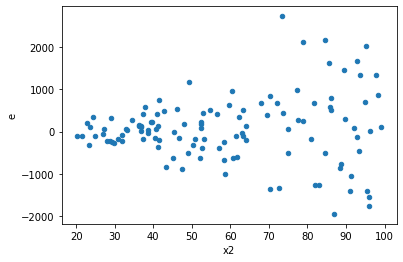

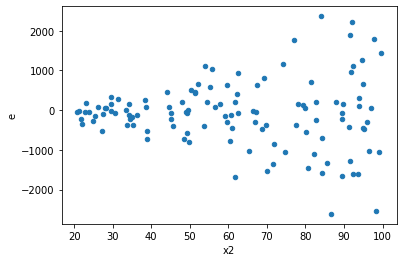

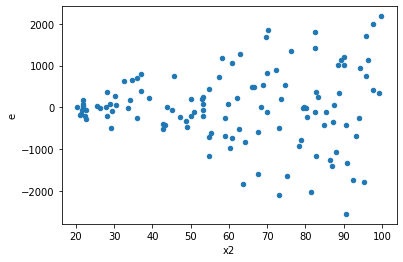

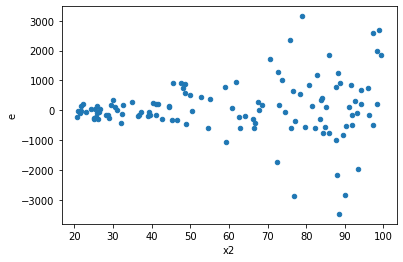

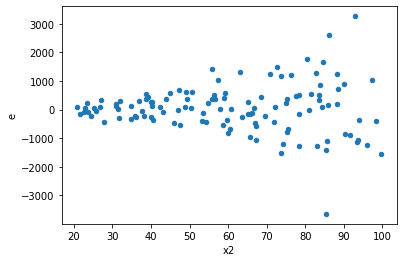

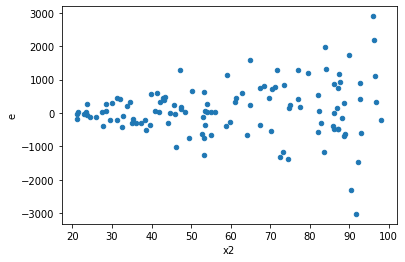

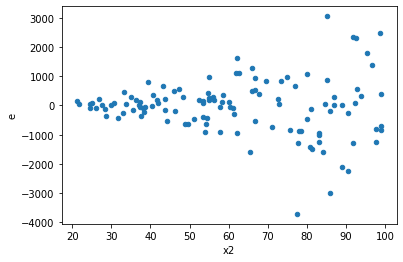

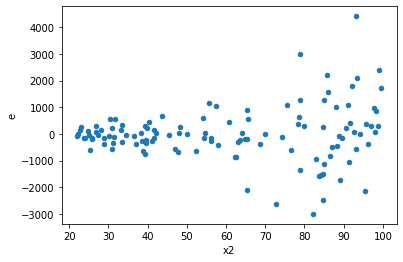

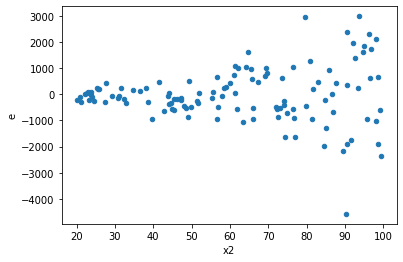

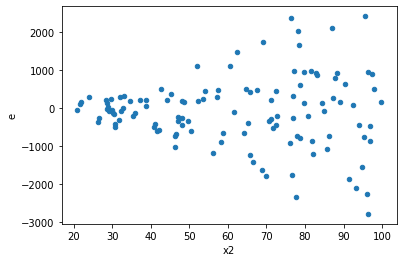

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,9590256.92446892,33248034.40879353,213116.82054375377,738845.2090843007,3.466855442002114,5.708956881878002e-05,0.9999714552155906,2.854478440939001e-05,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,15662001.32470469,54017187.149925835,348044.47388232645,1200381.9366650186,3.4489326127639273,6.10574897992322e-05,0.9999694712551004,3.05287448996161e-05,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,32001014.1697253,61783103.673345655,711133.6482161178,1372957.8594076813,1.9306608017378348,0.02962224587685558,0.9851888770615722,0.01481112293842779,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,11022478.973946076,47564543.5617989,244943.97719880167,1056989.8569288645,4.315231054123815,2.817543071298445e-06,0.9999985912284644,1.4087715356492225e-06,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,6606462.13666773,89489931.68700606,146810.26970372733,1988665.1486001345,13.545817691183254,6.661338147750939e-15,0.9999999999999967,3.3306690738754696e-15,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,36510800.19647838,65827358.82120931,811351.1154772973,1462830.1960268735,1.802955795736261,0.05091835245245657,0.9745408237737717,0.025459176226228286,Reject001=1 : Homoscedasticity
11.0,45.0,45.0,25823496.16376836,34174451.09184149,573855.4703059635,759432.2464853664,1.3233859147155267,0.35077961828937276,0.8246101908553136,0.17538980914468638,Reject001=1 : Homoscedasticity
13.0,45.0,45.0,21994449.767127674,49898183.60016206,488765.550380615,1108848.5244480458,2.2686716025394085,0.007021494865528055,0.996489252567236,0.0035107474327640276,Reject001=0 : Heteroscedasticity
16.0,45.0,45.0,12710628.357749913,74739450.31255558,282458.40794999804,1660876.6736123462,5.880075178736975,2.3941480131739468e-08,0.9999999880292599,1.1970740065869734e-08,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,9590256.92446892,33248034.40879353,213116.82054375377,738845.2090843007,3.466855442002114,5.708956881878002e-05,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,42747531.282335676,25131486.610771123,949945.1396074594,558477.4802393583,0.5879049820394205,0.0781369616641269,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,15662001.32470469,54017187.149925835,348044.47388232645,1200381.9366650186,3.4489326127639273,6.10574897992322e-05,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,32001014.1697253,61783103.673345655,711133.6482161178,1372957.8594076813,1.9306608017378348,0.02962224587685558,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,41027382.72947782,35351000.04991252,911719.6162106183,785577.7788869449,0.8616440459535609,0.6195595376449153,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,11022478.973946076,47564543.5617989,244943.97719880167,1056989.8569288645,4.315231054123815,2.817543071298445e-06,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,74148061.28211004,10371985.375060584,1647734.6951580008,230488.5638902352,0.1398820845173341,9.032011650453207e-10,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,6606462.13666773,89489931.68700606,146810.26970372733,1988665.1486001345,13.545817691183254,6.661338147750939e-15,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,36510800.19647838,65827358.82120931,811351.1154772973,1462830.1960268735,1.802955795736261,0.05091835245245657,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    578
Reject001=1 : Homoscedasticity      422
Name: Result_test, dtype: int64